# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [45]:
# Import numpy and pandas
import pandas as pd
import numpy as np

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [46]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [47]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [48]:
# Your code here:
sensor.isna().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [49]:
# Your code here:
print('cols =',len(sensor.columns))
print('rows =',len(sensor))

cols = 12
rows = 1751


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [50]:
# Your code here:
sensor['timeseries'] = pd.date_range(start='1/1/2021', periods=1751, freq='S')
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   attitude.roll       1751 non-null   float64       
 1   attitude.pitch      1751 non-null   float64       
 2   attitude.yaw        1751 non-null   float64       
 3   gravity.x           1751 non-null   float64       
 4   gravity.y           1751 non-null   float64       
 5   gravity.z           1751 non-null   float64       
 6   rotationRate.x      1751 non-null   float64       
 7   rotationRate.y      1751 non-null   float64       
 8   rotationRate.z      1751 non-null   float64       
 9   userAcceleration.x  1751 non-null   float64       
 10  userAcceleration.y  1751 non-null   float64       
 11  userAcceleration.z  1751 non-null   float64       
 12  timeseries          1751 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 

Assign the time series index to the dataframe's index.

In [51]:
df = sensor[['timeseries','userAcceleration.x']].reset_index(drop=True)
df_indx = df.set_index('timeseries')
df_indx

,userAcceleration.x
timeseries,
2021-01-01 00:00:00,0.294894
2021-01-01 00:00:01,0.219405
2021-01-01 00:00:02,0.010714
2021-01-01 00:00:03,-0.008389
2021-01-01 00:00:04,0.199441
...,...
2021-01-01 00:29:06,-0.268367
2021-01-01 00:29:07,-0.102444
2021-01-01 00:29:08,-0.085590


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [52]:
# Your code here:
import statsmodels.api as sm
import matplotlib.pyplot as plt

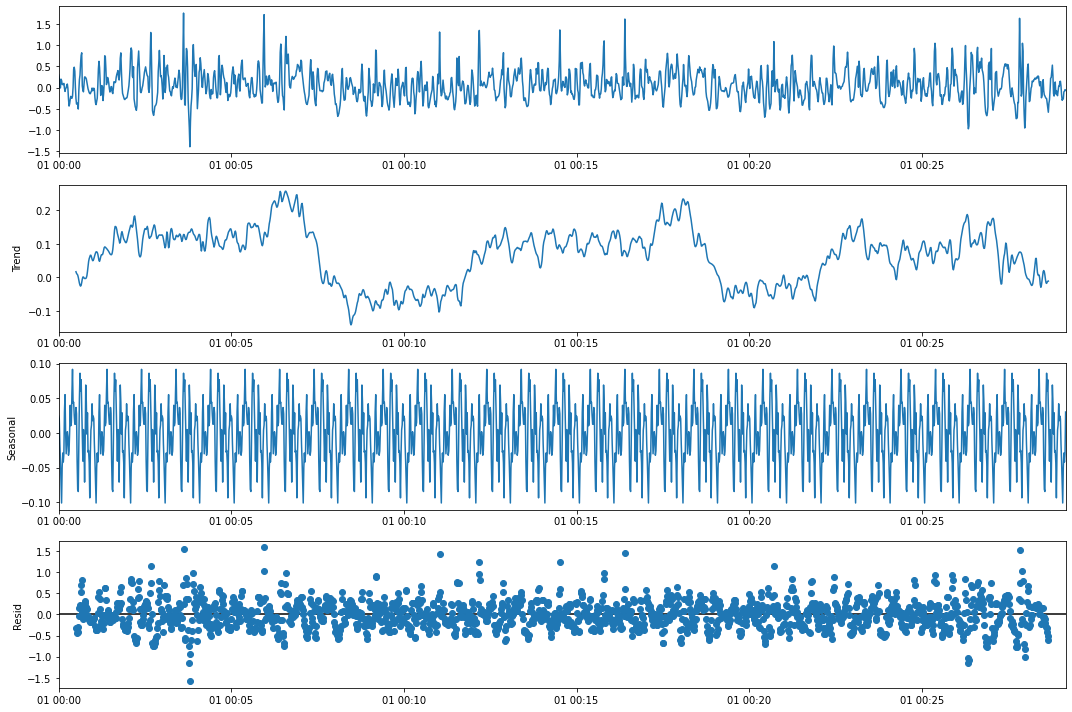

In [53]:
matplotlib.rcParams['figure.figsize']=15,10
decomposition = sm.tsa.seasonal_decompose(df_indx, model='additive', period=60)
fig = decomposition.plot()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [54]:
#
df = sensor[['timeseries','rotationRate.x']].reset_index(drop=True)
df_indx = df.set_index('timeseries')
# df_indx

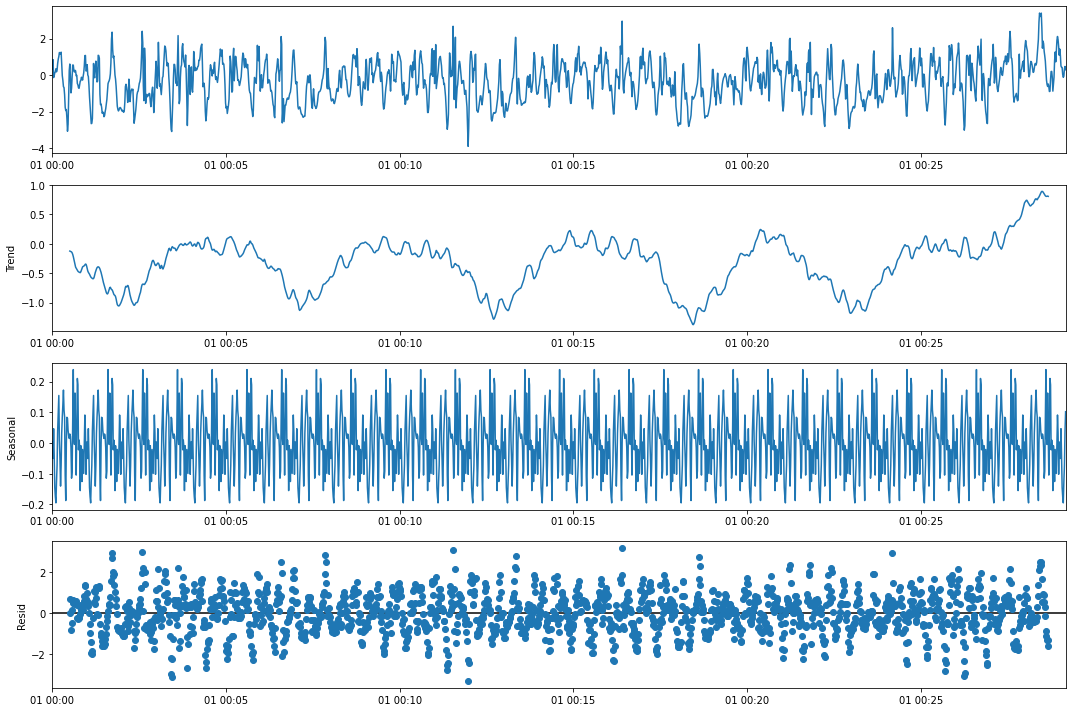

In [55]:
matplotlib.rcParams['figure.figsize']=15,10
decomposition = sm.tsa.seasonal_decompose(df_indx, model='additive', period=60)
fig = decomposition.plot()
plt.show()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

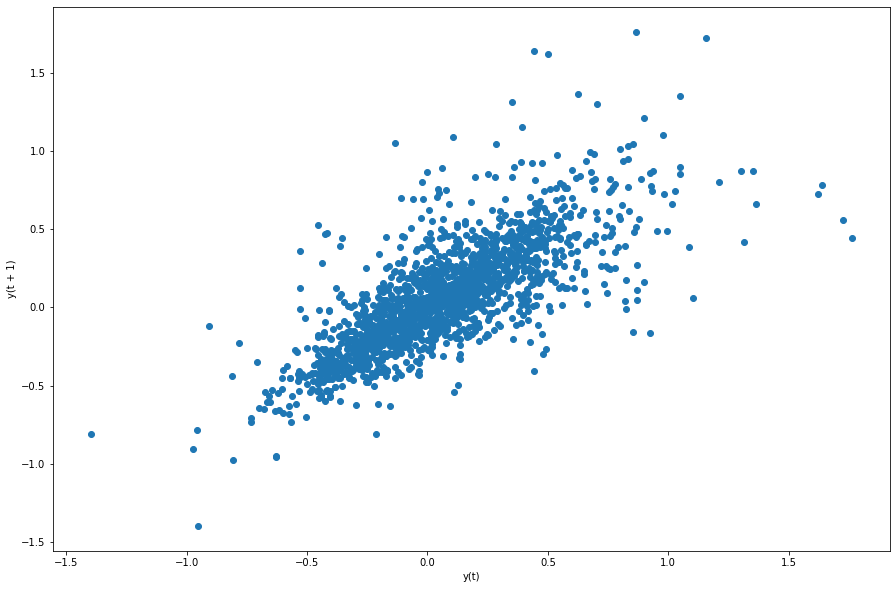

In [56]:
# Your code here:
df = sensor[['timeseries','userAcceleration.x','rotationRate.x']].reset_index(drop=True)
pd.plotting.lag_plot(df.iloc[:,1], lag=1)

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

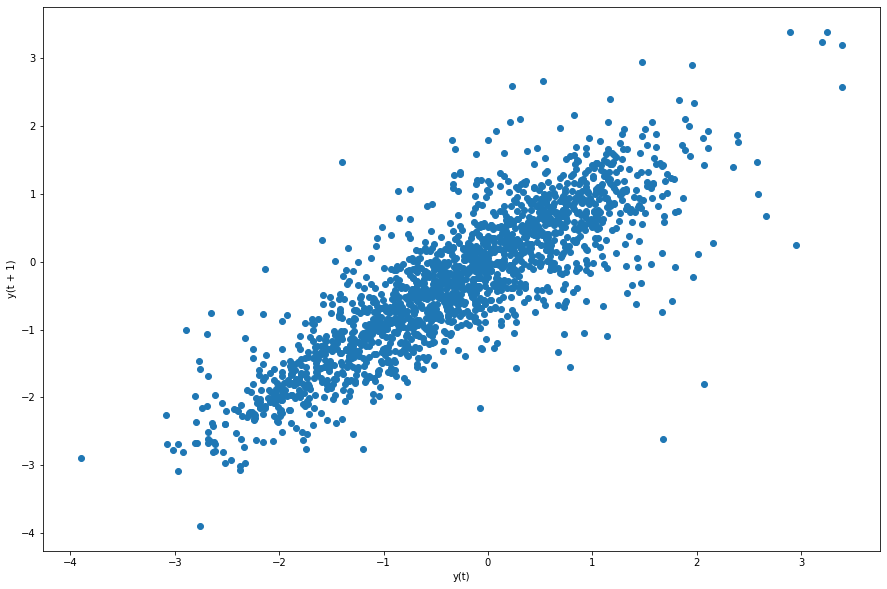

In [57]:
# Your code here:
pd.plotting.lag_plot(df.iloc[:,2], lag=1)

What are your conclusions from both visualizations?

In [58]:
# Your conclusions here:
# both has the same apereance with positive tendency

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [59]:
# Your code here:
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(df.iloc[:,1], autolag = None)
print(f'Prueba estadistica{df_test[0]}')
print(f'P-value={df_test[1]}')
print(f'Valores criticos:')
for k, v in df_test[4].items():
    print('\t{}:{} Los datos {} son estacionarios con {}% de confianza'.format(k, v, "no" if v < df_test[0] else "", 100-int(k[:-1])))
    

Prueba estadistica-8.160095026835918
P-value=9.193147705719652e-13
Valores criticos:
	1%:-3.4341465551936534 Los datos  son estacionarios con 99% de confianza
	5%:-2.863216966926812 Los datos  son estacionarios con 95% de confianza
	10%:-2.567662770090317 Los datos  son estacionarios con 90% de confianza


In [60]:
df_test = adfuller(df.iloc[:,2], autolag = None)
print(f'Prueba estadistica{df_test[0]}')
print(f'P-value={df_test[1]}')
print(f'Valores criticos:')
for k, v in df_test[4].items():
    print('\t{}:{} Los datos {} son estacionarios con {}% de confianza'.format(k, v, "no" if v < df_test[0] else "", 100-int(k[:-1])))

Prueba estadistica-5.269860625086418
P-value=6.320230335912299e-06
Valores criticos:
	1%:-3.4341465551936534 Los datos  son estacionarios con 99% de confianza
	5%:-2.863216966926812 Los datos  son estacionarios con 95% de confianza
	10%:-2.567662770090317 Los datos  son estacionarios con 90% de confianza


What are your conclusions from this test?

In [61]:
# Your conclusions here:
# That data for two variables are stacionary

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [62]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter('ignore')

# Common code for display result
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

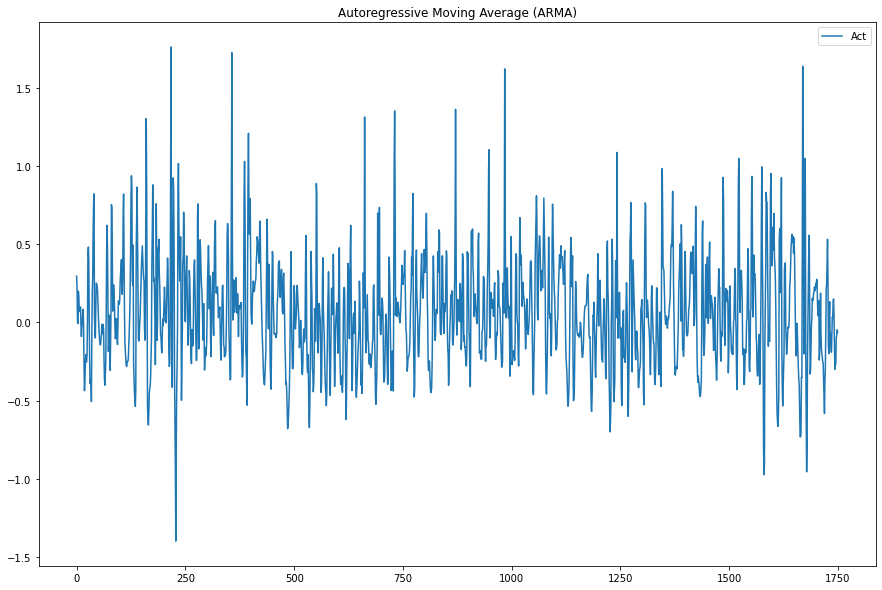

In [94]:
from statsmodels.tsa.arima_model import ARMA
from random import random

def ARMA_model(train,test):
    # fit model
    model = ARMA(train['Act'], order=(1,2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df1 = pd.DataFrame(sensor['userAcceleration.x'].head(1000).reset_index(drop=True))
df1.rename(columns={'userAcceleration.x':'Act'}, inplace=True)

df2 = pd.DataFrame(sensor['userAcceleration.x'].tail(750).reset_index(drop=True))
df2.rename(columns={'userAcceleration.x':'Act'}, inplace=True)

df_ret = ARMA_model(df1, df2)
show_graph(df1, df2, "Autoregressive Moving Average (ARMA)")


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [97]:
from statsmodels.tools.eval_measures import rmse
df_ret.tail(10)

,Pred,Act
1740,0.069671,0.149749
1741,0.069671,0.038461
1742,0.069671,-0.169175
1743,0.069671,-0.300361
1744,0.069671,-0.270174
1745,0.069671,-0.268367
1746,0.069671,-0.102444
1747,0.069671,-0.085590
1748,0.069671,-0.048105
1749,0.069671,-0.065011


In [107]:
# Your code here:
x1 = df_ret.iloc[:,0].tail(10)
x2 = df_ret.iloc[:,1].tail(10)
rmse_results = rmse(x1, x2, axis=0)
rmse_results

0.22734623084889613